## MI 07



In [73]:
import matplotlib.pyplot as plt
import numpy as np
import math

###  Exercise 1 : Training Data

In [181]:
data = []
for i in range (60):
    if np.random.binomial(1,0.5) == 0:
        data.append([np.random.multivariate_normal(np.array([0,1]).T,[[0.1, 0],[0,0.1]]), 0])
    else :
        data.append([np.random.multivariate_normal(np.array([1,0]).T,[[0.1, 0],[0,0.1]]),0])


for i in range (60):
    if np.random.binomial(1,0.5) == 0:
        data.append([np.random.multivariate_normal(np.array([0,0]).T,[[0.1, 0],[0,0.1]]),1])
    else :
        data.append([np.random.multivariate_normal(np.array([1,1]).T,[[0.1, 0],[0,0.1]]), 1])
x1 =[d[0][0] for d in data]
x2 =[d[0][1] for d in data]
y = [d[1] for d in data]
X_train = list(zip(x1,x2))

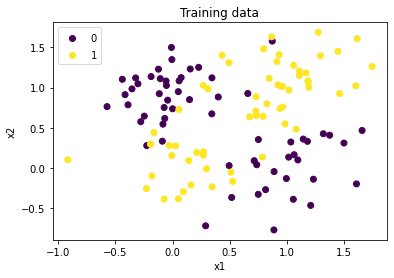

In [95]:
scatter = plt.scatter(x1,x2,c = y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(*scatter.legend_elements()) 
plt.title('Training data')
plt.show()

### Exercise 2 : k nearest neighbors

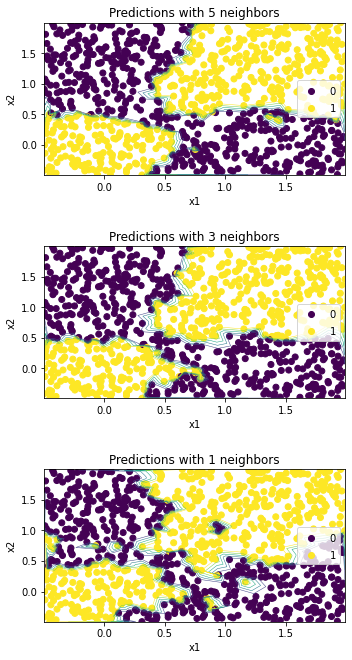

In [193]:
def euclidian_distance(test_row, train_row):
    distance = math.sqrt((test_row[0]- train_row[0])**2 + (test_row[1]- train_row[1])**2)
    return distance

def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidian_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key = lambda tup : tup[1])
    neighbors = list()
    for i in range (num_neighbors):
         neighbors.append(distances[i][0])
    return neighbors

def predict_classification (train, test, num_neighbors):
    prediction = []
    for test_row in test :
        neighbors = get_neighbors(train, test_row, num_neighbors)
        output_values =  [row[-1] for row in neighbors]
        prediction.append(max (set (output_values), key= output_values.count))
    return prediction

a = list(zip(x1,x2,y))
new_data = np.random.uniform(-0.5,2,  size = (1000,2))

predictions_5 = predict_classification(a,new_data,5)
predictions_3 = predict_classification(a,new_data,3)
predictions_1 = predict_classification(a,new_data,1)


    
fig,ax = plt.subplots((1,3), figsize = (6,10))
fig.tight_layout(pad = 5)
ax[0,0].scatter(new_data[:,0], new_data[:,1], c = predictions_5)
ax[0,0].tricontour(new_data[:,0], new_data[:,1], predictions_5, 5, linewidths=0.5)
ax[0,0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].legend(*scatter.legend_elements()) 
ax[0].set_title('Predictions with 5 neighbors')
ax[1].scatter(new_data[:,0], new_data[:,1], c = predictions_3)
ax[1].tricontour(new_data[:,0], new_data[:,1], predictions_3, 5, linewidths=0.5)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].legend(*scatter.legend_elements()) 
ax[1].set_title('Predictions with 3 neighbors')
ax[2].scatter(new_data[:,0], new_data[:,1], c = predictions_1)
ax[2].tricontour(new_data[:,0], new_data[:,1], predictions_1, 5, linewidths=0.5)
ax[2].set_xlabel('x1')
ax[2].set_ylabel('x2')
ax[2].legend(*scatter.legend_elements()) 
ax[2].set_title('Predictions with 1 neighbors')
plt.show()


### Exercise 3

In [190]:
def kernel(test_point, train_point, sigma):
    return math.exp(- (1/(2*sigma))*(euclidian_distance(test_point,train_point))**2)

def prediction (Test, X_train, Y_train, sigma):

    predictions = []
    for j in range(len(Test)):
        P = 0
        Z = 0        
        for i in range (len(X_train)):
            P += Y_train[i]*kernel(Test[j], X_train[i],sigma)
            Z += kernel(Test[j], X_train[i],sigma)
        predictions.append(P/Z)
    return predictions



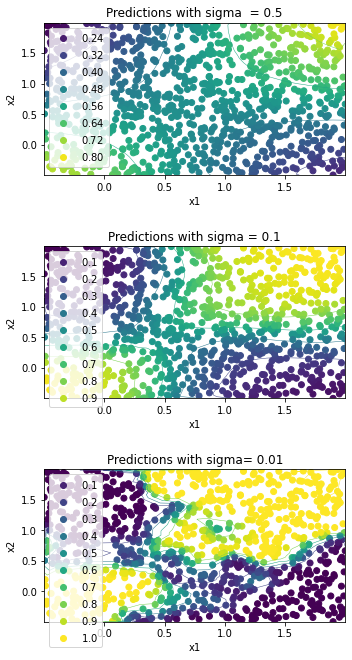

In [191]:
predictions_05 = prediction(new_data,X_train,y,0.5)
predictions_01 = prediction(new_data,X_train,y,0.1)
predictions_001 = prediction(new_data,X_train,y,0.01)

    
fig,ax = plt.subplots(3, figsize = (6,10))
fig.tight_layout(pad = 5)
sat = ax[0].scatter(new_data[:,0], new_data[:,1], c = predictions_05)
ax[0].tricontour(new_data[:,0], new_data[:,1], predictions_05, 5, linewidths=0.5)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].legend(*sat.legend_elements()) 
ax[0].set_title('Predictions with sigma  = 0.5')
sati=ax[1].scatter(new_data[:,0], new_data[:,1], c = predictions_01)
ax[1].tricontour(new_data[:,0], new_data[:,1], predictions_01, 5, linewidths=0.5)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].legend(*sati.legend_elements()) 
ax[1].set_title('Predictions with sigma = 0.1')
satir = ax[2].scatter(new_data[:,0], new_data[:,1], c = predictions_001)
ax[2].tricontour(new_data[:,0], new_data[:,1], predictions_001, 5, linewidths=0.5)
ax[2].set_xlabel('x1')
ax[2].set_ylabel('x2')
ax[2].legend(*satir.legend_elements()) 
ax[2].set_title('Predictions with sigma= 0.01')
plt.show()

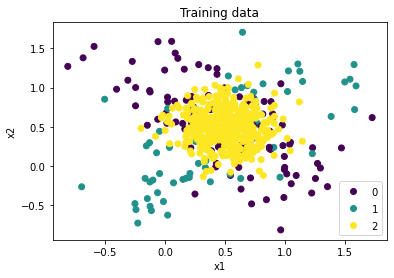

In [198]:
data_added = data
for i in range (60):
        data_added.append([np.random.multivariate_normal(np.array([0.5,0.5]).T,[[0.05, 0],[0,0.05]]), 2])
x1_ad =[d[0][0] for d in data_added]
x2_ad =[d[0][1] for d in data_added]
y_ad = [d[1] for d in data_added]
X_train_ad = list(zip(x1_ad,x2_ad))
a_ad = list(zip(x1_ad,x2_ad,y_ad))

scatter = plt.scatter(x1_ad,x2_ad,c = y_ad)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(*scatter.legend_elements()) 
plt.title('Training data')
plt.show()



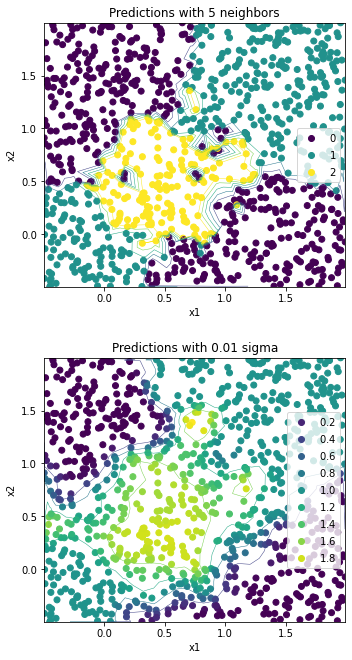

In [209]:

predictions_5_ad = predict_classification(a_ad,new_data,5)
predictions_001_ad = prediction(new_data,X_train_ad,y_ad,0.01)


fig,ax = plt.subplots(2, figsize = (6,10))
fig.tight_layout(pad = 5)
sa  = ax[0].scatter(new_data[:,0], new_data[:,1], c = predictions_5_ad)
ax[0].tricontour(new_data[:,0], new_data[:,1], predictions_5_ad, 5, linewidths=0.5)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].legend(*sa.legend_elements()) 
ax[0].set_title('Predictions with 5 neighbors')
sar  = ax[1].scatter(new_data[:,0], new_data[:,1], c = predictions_001_ad)
ax[1].tricontour(new_data[:,0], new_data[:,1], predictions_001_ad, 5, linewidths=0.5)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].legend(*sar.legend_elements()) 
ax[1].set_title('Predictions with 0.01 sigma')

plt.show()

